#**HIV PROVINCIAL INCIDENCE ANALYSIS IN KENYA**

This Notebook provides an analysis of time series Data on HIV Incidence per 1000 individuals between the age of 18 to 49 across the kenyan provices from 1990 to 2022. It focuses on provincial trend analysis and answers the questions such as:

1. Which province recorded the highest incidence across each year

2. which province recorded least incidence across each year

3. which year was recorded highest incidence on average across all the provinces

4. which year was recorded lowest incidence on average across all the provinces

5. Additionally, it Utilizes a prediction model to predict the potential incidence level of HIV per 1000 people in Kenya between 2023 and 2030.

The dataset was acquired from https://www.kaggle.com/datasets/lindleylawrence/hiv-incidence-per-1000-population

In [216]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.rcParams['figure.facecolor'] = 'lightblue'
matplotlib.rcParams['axes.facecolor'] = '#EEEEEE'



In [68]:
from google.colab import files
uploaded=files.upload()
file_name = next(iter(uploaded))
df = pd.read_excel(file_name)

Saving HIV INCIDENCE KENYA DATASET.xlsx to HIV INCIDENCE KENYA DATASET (1).xlsx


In [69]:
df.head()

,year,central,coast,eastern,nairobi,north eastern,nyanza,riftvalley,western
0,1990,10.8502,20.2611,8.9075,14.6626,6.4174,35.3064,17.4566,22.9993
1,1991,13.7527,20.0283,12.4468,14.7560,6.0646,39.8624,18.2252,23.8143
2,1992,14.6558,18.3579,14.8788,14.1296,4.6525,41.2166,17.4761,21.9611
3,1993,13.4771,16.6915,15.0924,12.9440,3.1492,40.2621,14.8927,19.4072
4,1994,10.7443,14.1809,13.4570,11.2417,2.2910,37.3430,12.6077,15.7901


In [70]:
df.tail()

,year,central,coast,eastern,nairobi,north eastern,nyanza,riftvalley,western
28,2018,0.5121,0.8941,0.8669,0.1693,0.0054,3.2728,1.1030,0.9297
29,2019,0.4514,0.8474,0.8033,0.1591,0.0051,3.2446,1.0115,0.8802
30,2020,0.4312,0.8421,0.6902,0.1138,0.0048,3.1078,0.9790,0.8617
31,2021,0.3843,0.6577,0.6083,0.1974,0.0189,2.5891,0.8879,0.7131
32,2022,0.2809,0.4234,0.4556,0.6167,0.0181,1.8056,0.7398,0.5519


In [71]:
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           33 non-null     int64  
 1   central        33 non-null     float64
 2   coast          33 non-null     float64
 3   eastern        33 non-null     float64
 4   nairobi        33 non-null     float64
 5   north eastern  33 non-null     float64
 6   nyanza         33 non-null     float64
 7   riftvalley     33 non-null     float64
 8   western        33 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 2.4 KB


In [72]:
df.describe()

,year,central,coast,eastern,nairobi,north eastern,nyanza,riftvalley,western
count,33.00000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
mean,2006.00000,3.620512,5.828988,4.215773,4.739336,0.953345,16.081709,5.194236,6.043330
std,9.66954,4.299211,5.951049,4.369823,4.572342,1.710126,12.387223,5.252447,6.941036
min,1990.00000,0.280900,0.423400,0.455600,0.113800,0.004800,1.805600,0.739800,0.551900
25%,1998.00000,0.859500,1.562400,1.354500,0.714600,0.011400,7.029900,1.649000,1.845600
50%,2006.00000,1.709100,3.412100,2.248800,3.961600,0.130600,11.520200,2.953700,2.891200
75%,2014.00000,4.002800,7.545200,4.844100,6.624500,0.932000,22.688900,6.074100,6.816700
max,2022.00000,14.655800,20.261100,15.092400,14.756000,6.417400,41.216600,18.225200,23.814300


In [73]:
df.isnull().head(5)


,year,central,coast,eastern,nairobi,north eastern,nyanza,riftvalley,western
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False


#**INCIDENCE LEVELS PER PROVINCES 1990-2022**

In [74]:
#incidence trend in central
df.groupby('year')['central'].value_counts().sort_index(level='central',ascending=False).head()

,,count
year,central,
1992,14.6558,1
1991,13.7527,1
1993,13.4771,1
1990,10.8502,1
1994,10.7443,1


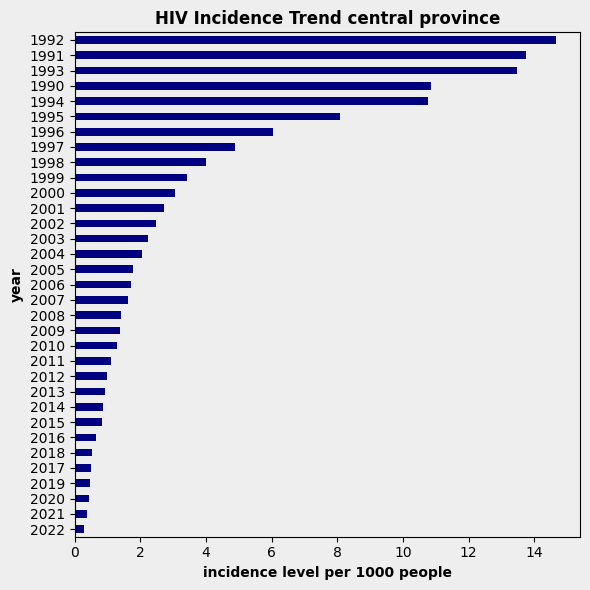

In [235]:
central_trend=df.groupby('year')['central'].mean().sort_values(ascending=True)
plt.figure(figsize=(6,6),facecolor='#EEEEEE')
central_trend.plot(kind='barh',color='navy')
plt.title('HIV Incidence Trend central province',fontweight='bold')
plt.xlabel('incidence level per 1000 people',fontweight='bold')
plt.ylabel('year',fontweight='bold')
plt.xticks(rotation=0)
plt. tight_layout()

plt.savefig('my_plot.pdf', bbox_inches='tight')
plt.close(fig)

In [76]:
#incidence trend in coast
df.groupby('year')['coast'].value_counts().sort_index(level='coast',ascending=False).head(10)

,,count
year,coast,
1990,20.2611,1
1991,20.0283,1
1992,18.3579,1
1993,16.6915,1
1994,14.1809,1
1995,12.1086,1
1996,10.0228,1
1997,8.6072,1
1998,7.5452,1


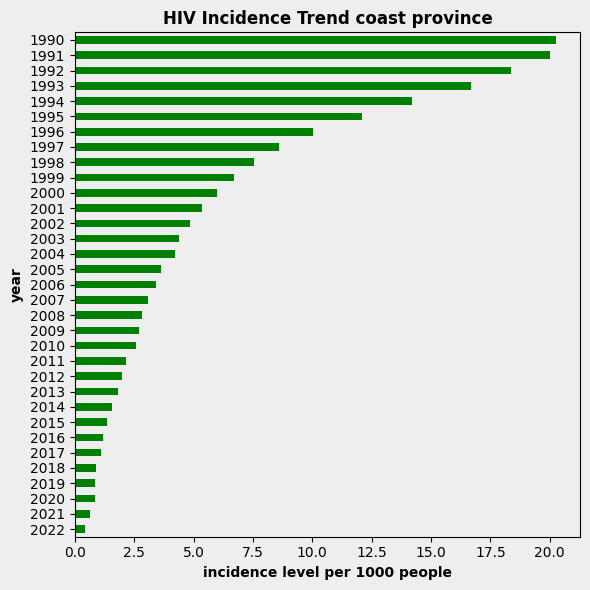

In [234]:
coast_trend=df.groupby('year')['coast'].mean().sort_values(ascending=True)
plt.figure(figsize=(6,6),facecolor='#EEEEEE')

coast_trend.plot(kind='barh', color='green')
plt.title('HIV Incidence Trend coast province',fontweight='bold')
plt.xlabel('incidence level per 1000 people',fontweight='bold')
plt.ylabel('year',fontweight='bold')
plt.xticks(rotation=0)
plt. tight_layout()
plt.show()

In [ ]:
#incidence trend in eastern
df.groupby('year')['eastern'].value_counts().sort_index(level='eastern',ascending=False).head(10)

year  eastern
1993  15.0924    1
1992  14.8788    1
1994  13.4570    1
1991  12.4468    1
1995  10.1394    1
1990  8.9075     1
1996  7.5395     1
1997  6.0866     1
1998  4.8441     1
1999  4.2966     1
Name: count, dtype: int64

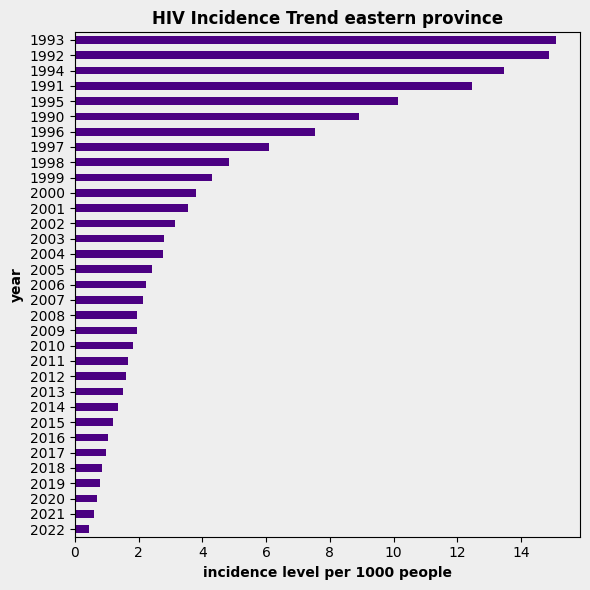

In [233]:
eastern_trend=df.groupby('year')['eastern'].mean().sort_values(ascending=True)
plt.figure(figsize=(6,6),facecolor='#EEEEEE')
eastern_trend.plot(kind='barh',color='indigo')
plt.title('HIV Incidence Trend eastern province',fontweight='bold')
plt.xlabel('incidence level per 1000 people',fontweight='bold')
plt.ylabel('year',fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#incidence trend nairobi
df.groupby('year')['nairobi'].value_counts().sort_index(level='nairobi',ascending=False).head(10)

year  nairobi
1991  14.7560    1
1990  14.6626    1
1992  14.1296    1
1993  12.9440    1
1994  11.2417    1
1995  9.8902     1
1996  8.4699     1
1997  7.4485     1
1998  6.6245     1
1999  5.8198     1
Name: count, dtype: int64

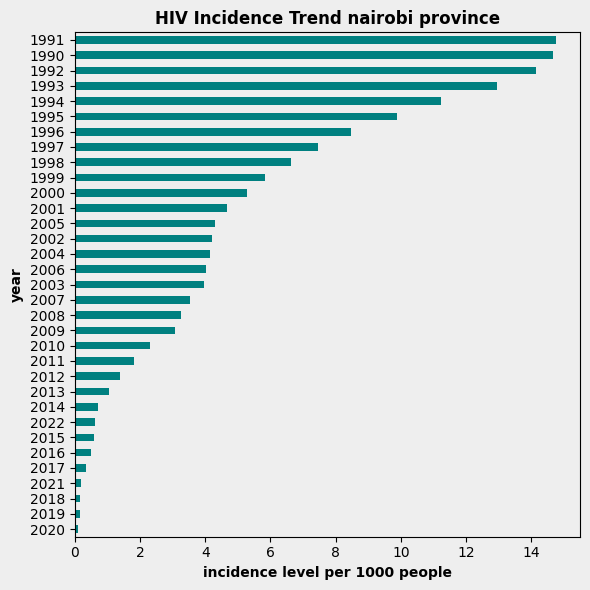

In [232]:
nairobi_trend=df.groupby('year')['nairobi'].mean().sort_values(ascending=True)
plt.figure(figsize=(6,6),facecolor='#EEEEEE')
nairobi_trend.plot(kind='barh',color='teal')
plt.ylabel('year',fontweight='bold')
plt.title('HIV Incidence Trend nairobi province',fontweight='bold')
plt.xlabel('incidence level per 1000 people',fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#incidene trend north eastern
df.groupby('year')['north eastern'].value_counts().sort_index(level='north eastern',ascending=False).head(10)

year  north eastern
1990  6.4174           1
1991  6.0646           1
1992  4.6525           1
1993  3.1492           1
1994  2.2910           1
1995  1.7473           1
1996  1.3360           1
1997  1.1093           1
1998  0.9320           1
1999  0.7670           1
Name: count, dtype: int64

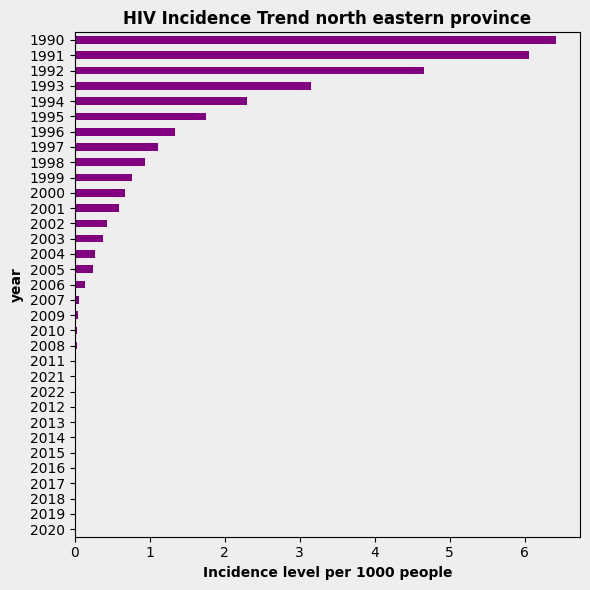

In [231]:
north_eastern_trend=df.groupby('year')['north eastern'].mean().sort_values(ascending=True)
plt.figure(figsize=(6,6),facecolor='#EEEEEE')
north_eastern_trend.plot(kind='barh',color='purple')
plt.title('HIV Incidence Trend north eastern province',fontweight='bold')
plt.xlabel('Incidence level per 1000 people',fontweight='bold')
plt.ylabel('year',fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#incidence trend nyanza
df.groupby('year')['nyanza '].value_counts().sort_index(level='nyanza ',ascending=False).head(10)

year  nyanza 
1992  41.2166    1
1993  40.2621    1
1991  39.8624    1
1994  37.3430    1
1990  35.3064    1
1995  32.6518    1
1996  29.5830    1
1997  26.2466    1
1998  22.6889    1
1999  20.3956    1
Name: count, dtype: int64

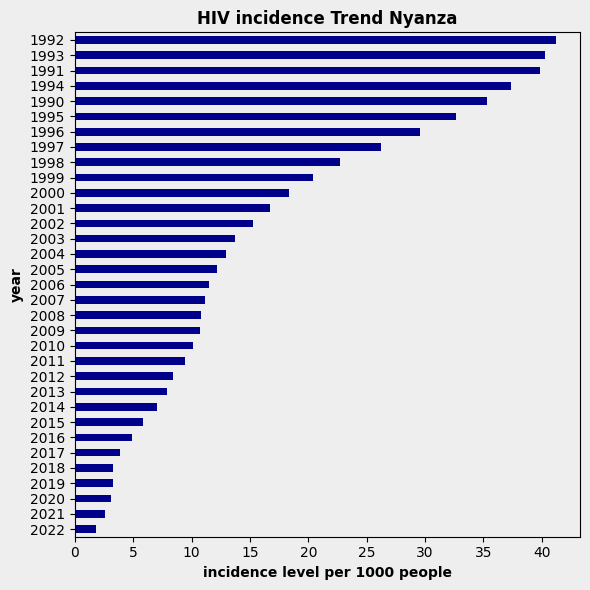

In [230]:
trend_nyanza=df.groupby('year')['nyanza '].mean().sort_values(ascending=True)
plt.figure(figsize=(6,6),facecolor='#EEEEEE')
trend_nyanza.plot(kind='barh',color='darkblue')
plt.title('HIV incidence Trend Nyanza',fontweight='bold')
plt.xlabel('incidence level per 1000 people',fontweight='bold')
plt.ylabel('year',fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#incidence trend rift valley
df.groupby('year')['riftvalley'].value_counts().sort_index(level='riftvalley',ascending=False).head(10)

year  riftvalley
1991  18.2252       1
1992  17.4761       1
1990  17.4566       1
1993  14.8927       1
1994  12.6077       1
1995  10.0522       1
1996  8.6447        1
1997  6.9925        1
1998  6.0741        1
1999  5.4919        1
Name: count, dtype: int64

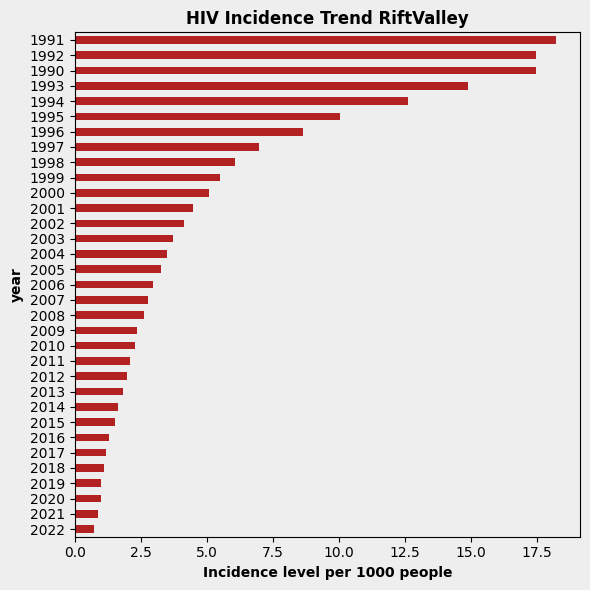

In [229]:
trend_rift=df.groupby('year')['riftvalley'].mean().sort_values(ascending=True)
plt.figure(figsize=(6,6),facecolor='#EEEEEE')
trend_rift.plot(kind='barh',color='firebrick')
plt.title('HIV Incidence Trend RiftValley',fontweight='bold')
plt.xlabel('Incidence level per 1000 people',fontweight='bold')
plt.ylabel('year',fontweight='bold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
#incidence trend western
df.groupby('year')['western'].value_counts().sort_index(level='western',ascending=False).head(10)

year  western
1991  23.8143    1
1990  22.9993    1
1992  21.9611    1
1993  19.4072    1
1994  15.7901    1
1995  12.1258    1
1996  9.6368     1
1997  7.9217     1
1998  6.8167     1
1999  5.9444     1
Name: count, dtype: int64

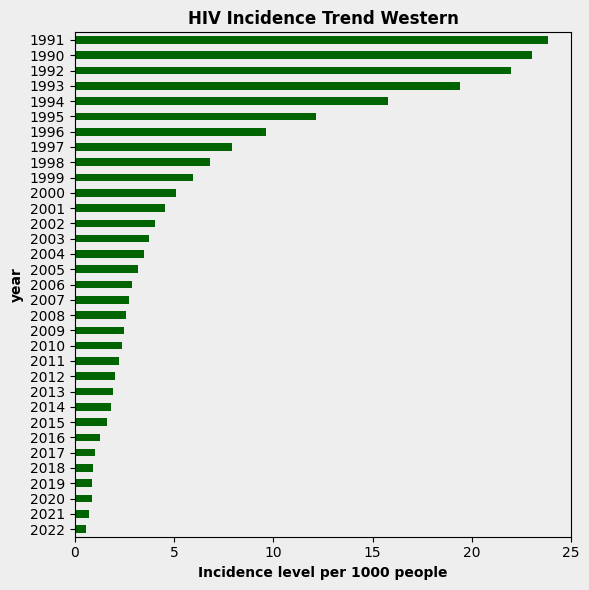

In [228]:
trend_western=df.groupby('year')['western'].mean().sort_values(ascending=True)
plt.figure(figsize=(6,6),facecolor= '#EEEEEE')
trend_western.plot(kind='barh',color='darkgreen')
plt.title('HIV Incidence Trend Western',fontweight='bold')
plt.xlabel('Incidence level per 1000 people',fontweight='bold')
plt.ylabel('year',fontweight='bold')
plt.tight_layout()
plt.show()

In [112]:
df1=pd.read_excel('HIV INCIDENCE KENYA DATASET.xlsx',index_col=None)
print(df1.columns.tolist())

['year', 'central', 'coast', 'eastern', 'nairobi', 'north eastern', 'nyanza ', 'riftvalley', 'western']


In [113]:
df1.head()

,year,central,coast,eastern,nairobi,north eastern,nyanza,riftvalley,western
0,1990,10.8502,20.2611,8.9075,14.6626,6.4174,35.3064,17.4566,22.9993
1,1991,13.7527,20.0283,12.4468,14.7560,6.0646,39.8624,18.2252,23.8143
2,1992,14.6558,18.3579,14.8788,14.1296,4.6525,41.2166,17.4761,21.9611
3,1993,13.4771,16.6915,15.0924,12.9440,3.1492,40.2621,14.8927,19.4072
4,1994,10.7443,14.1809,13.4570,11.2417,2.2910,37.3430,12.6077,15.7901


In [ ]:
df1.index

Index([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022],
      dtype='int64', name='year')

In [114]:
df_melted=df1.reset_index().melt(id_vars='year',var_name='province',value_name='incidence')
print("\n data frame head(melted for seaborn):")
print(df_melted.head())



 data frame head(melted for seaborn):
   year province  incidence
0  1990    index        0.0
1  1991    index        1.0
2  1992    index        2.0
3  1993    index        3.0
4  1994    index        4.0


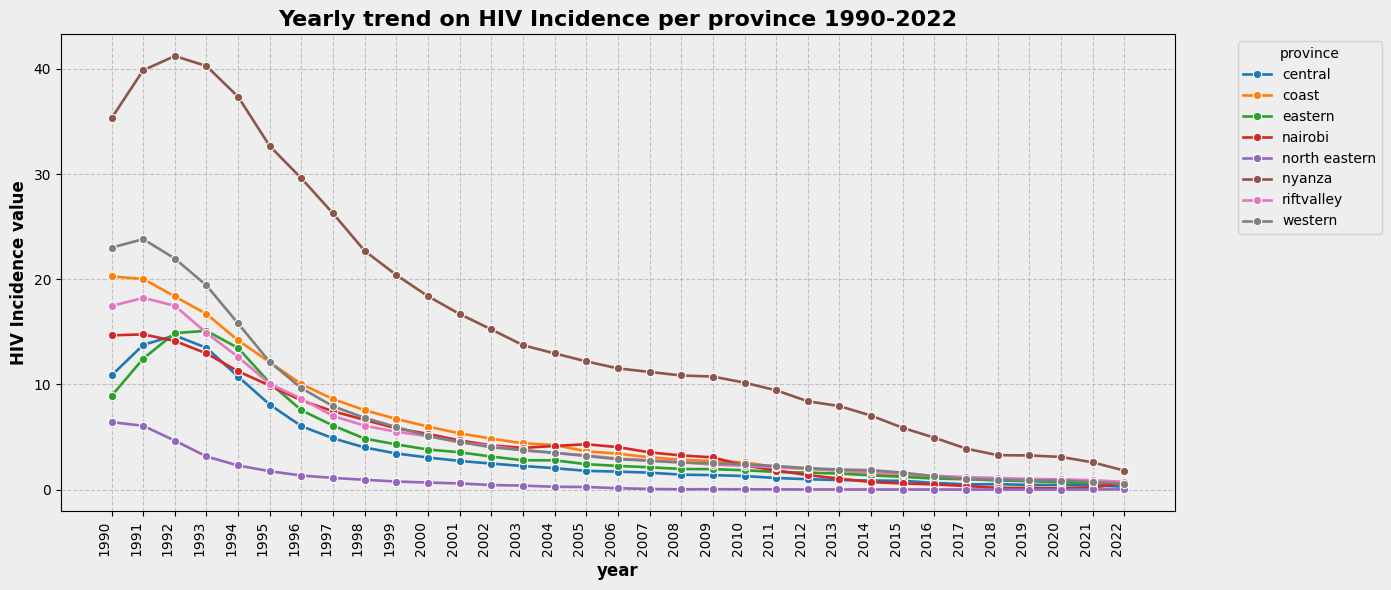

In [224]:
#Incident rate per province across the years
df_filtered = df_melted[df_melted['province'] != 'index']

# #Incident rate per province across the years
plt.figure(figsize=(16,6),facecolor='#EEEEEE')
ax_mpl = plt.gca()
sns.lineplot(data=df_filtered,x='year',y='incidence',hue='province',marker='o',linewidth=1.9,) # Use df_filtered here
start_year=1990
end_year=2022
plt.title(f'Yearly trend on HIV Incidence per province {start_year}-{end_year}',fontsize=16,fontweight='bold')
plt.xlabel('year',fontsize=12,fontweight='bold')
plt.ylabel('HIV Incidence value', fontsize=12,fontweight='bold')
ax_mpl.set_xticks(range(start_year,end_year+1))
plt.xticks(rotation=90, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='province', bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout(rect=[0,0,0.88,1])
plt.show()

**Nyanza province has has had the highest incident rate across the 32 year time period with peak incidence in 1992 and lowest incidence in 2022.**

**North eastern province has consistently exhibited the lowwest incident rate across the time period with its highest peak year being 1990 and the lowest incidence being in 2022.**

**Overally 2022 exhibited the lowest incidence rate across all the provinces**

In [ ]:

columns_to_mean=['central','coast','eastern','nairobi','north eastern','nyanza ','riftvalley','western']
mean_value=df[columns_to_mean].mean()
print(mean_value)

central           3.620512
coast             5.828988
eastern           4.215773
nairobi           4.739336
north eastern     0.953345
nyanza           16.081709
riftvalley        5.194236
western           6.043330
dtype: float64


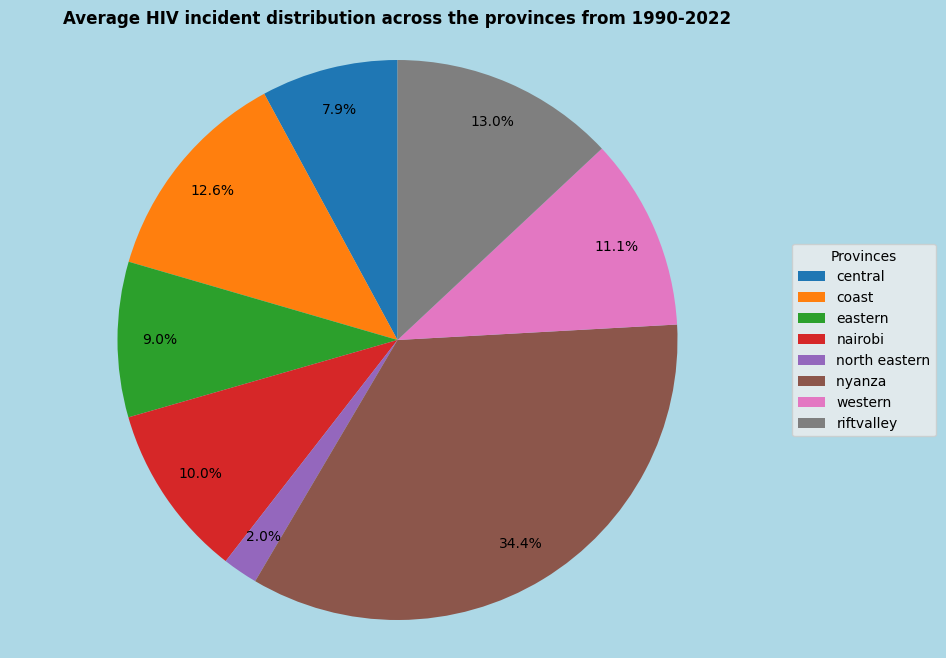

In [236]:
# average incident distribution across the provinces from 1990-2022
labels = ['central', 'coast','eastern', 'nairobi', 'north eastern', 'nyanza ', 'western', 'riftvalley']
values = [3.7,5.9,4.2, 4.7, 0.95, 16.1, 5.2, 6.1]
plt.figure(figsize=(10,8))
plt.pie(values, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

plt.title('Average HIV incident distribution across the provinces from 1990-2022', fontweight='bold')
plt.axis('equal')
plt.legend(labels, title="Provinces", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

plt.show()

**Nyanza province leads with the highest average incidence rate per 1000 people from 1990 to 2022. It is followed by western, coast, riftvalley, nairobi, eastern, central, and North eastern.**

#**PREDICTION MODEL ON HIV INCIDENCE PER 1000 PEOPLE ACROSS THE 8 PROVINCES 2023-2030**

**The prediction utilizes the *Facebook prophet forecasting tool* for the decompOsition of time series analysis**

In [239]:
from prophet import Prophet
import warnings

DataFrame loaded successfully:
   year  central    coast  eastern  nairobi  north eastern  nyanza   \
0  1990  10.8502  20.2611   8.9075  14.6626         6.4174  35.3064   
1  1991  13.7527  20.0283  12.4468  14.7560         6.0646  39.8624   
2  1992  14.6558  18.3579  14.8788  14.1296         4.6525  41.2166   
3  1993  13.4771  16.6915  15.0924  12.9440         3.1492  40.2621   
4  1994  10.7443  14.1809  13.4570  11.2417         2.2910  37.3430   

   riftvalley  western  
0     17.4566  22.9993  
1     18.2252  23.8143  
2     17.4761  21.9611  
3     14.8927  19.4072  
4     12.6077  15.7901  

Columns in your DataFrame: ['year', 'central', 'coast', 'eastern', 'nairobi', 'north eastern', 'nyanza ', 'riftvalley', 'western']

Identified province columns: ['central', 'coast', 'eastern', 'nairobi', 'north eastern', 'nyanza ', 'riftvalley', 'western']

--- Processing central Province ---
Prepared data for central (first 5 rows):
          ds        y
0 1990-01-01  10.8502
1 1991-01-0

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/vrlabatt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/s63_gwm3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35651', 'data', 'file=/tmp/tmp5zwvw_l3/vrlabatt.json', 'init=/tmp/tmp5zwvw_l3/s63_gwm3.json', 'output', 'file=/tmp/tmp5zwvw_l3/prophet_modelfaejnhz1/prophet_model-20250729122545.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:25:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Prophet model fitted for central.
Forecast generated for central (first 5 prediction rows):
          ds      yhat  yhat_lower  yhat_upper
0 2023-12-31 -3.050141   -6.210213   -0.280201
1 2024-12-31 -3.402626   -6.756927   -0.459470
2 2025-12-31 -3.775924   -6.758358   -0.678150
3 2026-12-31 -4.151382   -7.180329   -1.328404
4 2027-12-31 -4.529002   -7.610891   -1.532619
Displaying plots for central...


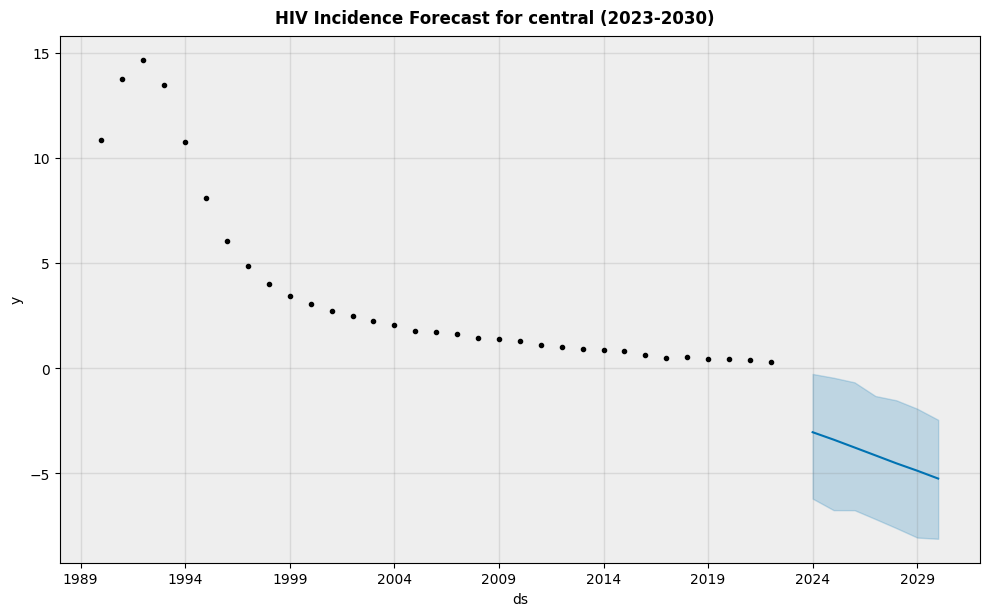

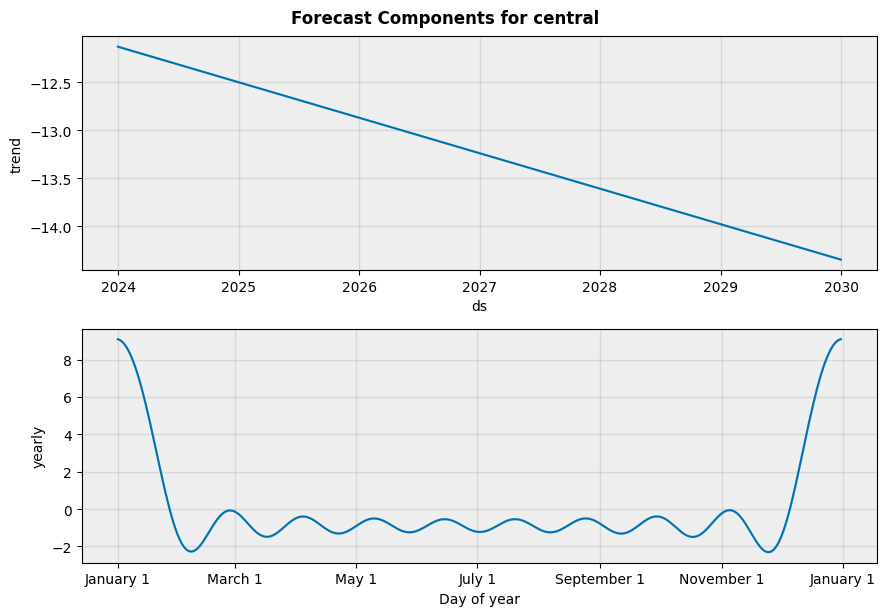

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/240um4xg.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/gx8pcmfd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=49989', 'data', 'file=/tmp/tmp5zwvw_l3/240um4xg.json', 'init=/tmp/tmp5zwvw_l3/gx8pcmfd.json', 'output', 'file=/tmp/tmp5zwvw_l3/prophet_modelkqmfyj96/prophet_model-20250729122546.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



--- Processing coast Province ---
Prepared data for coast (first 5 rows):
          ds        y
0 1990-01-01  20.2611
1 1991-01-01  20.0283
2 1992-01-01  18.3579
3 1993-01-01  16.6915
4 1994-01-01  14.1809


12:25:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Prophet model fitted for coast.
Forecast generated for coast (first 5 prediction rows):
          ds      yhat  yhat_lower  yhat_upper
0 2023-12-31 -4.993969   -8.274508   -1.765712
1 2024-12-31 -4.747761   -8.459760   -1.240824
2 2025-12-31 -5.497504   -8.980472   -2.104166
3 2026-12-31 -6.306627   -9.803391   -2.942467
4 2027-12-31 -7.174696  -10.325862   -3.643424
Displaying plots for coast...


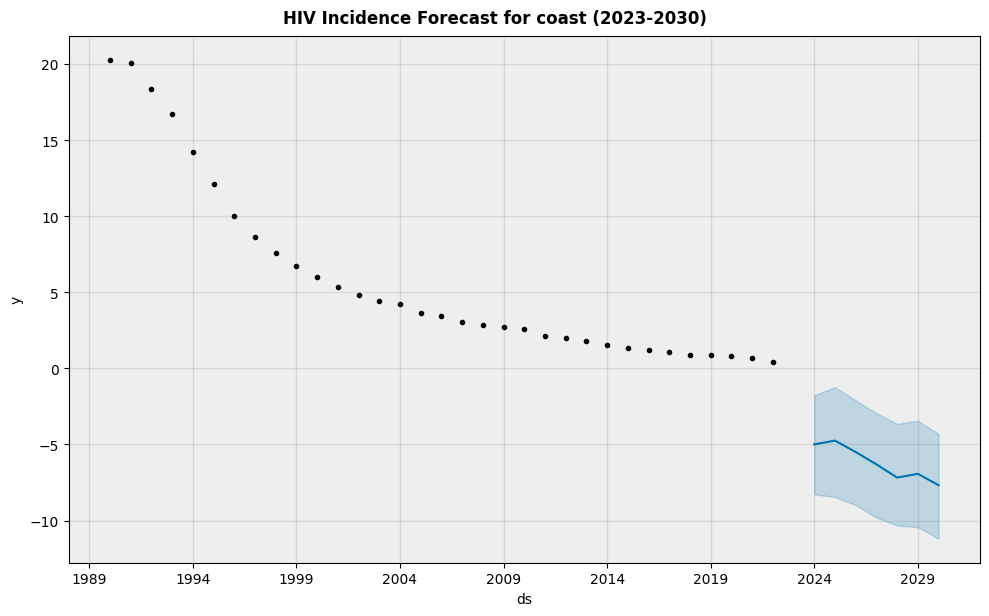

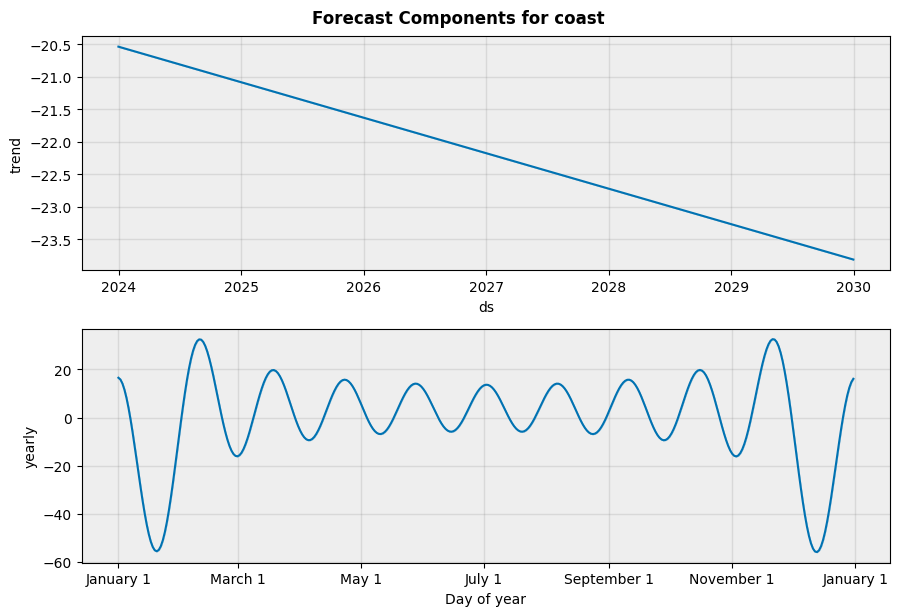

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/d_ehdlag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/x5fzbnul.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29015', 'data', 'file=/tmp/tmp5zwvw_l3/d_ehdlag.json', 'init=/tmp/tmp5zwvw_l3/x5fzbnul.json', 'output', 'file=/tmp/tmp5zwvw_l3/prophet_model666oi9a8/prophet_model-20250729122547.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



--- Processing eastern Province ---
Prepared data for eastern (first 5 rows):
          ds        y
0 1990-01-01   8.9075
1 1991-01-01  12.4468
2 1992-01-01  14.8788
3 1993-01-01  15.0924
4 1994-01-01  13.4570


12:25:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Prophet model fitted for eastern.
Forecast generated for eastern (first 5 prediction rows):
          ds      yhat  yhat_lower  yhat_upper
0 2023-12-31 -2.514584   -5.574400    0.283676
1 2024-12-31 -3.049264   -5.862509    0.028077
2 2025-12-31 -3.400895   -6.388119   -0.482972
3 2026-12-31 -3.729428   -6.858778   -0.662526
4 2027-12-31 -4.034988   -7.098590   -1.045999
Displaying plots for eastern...


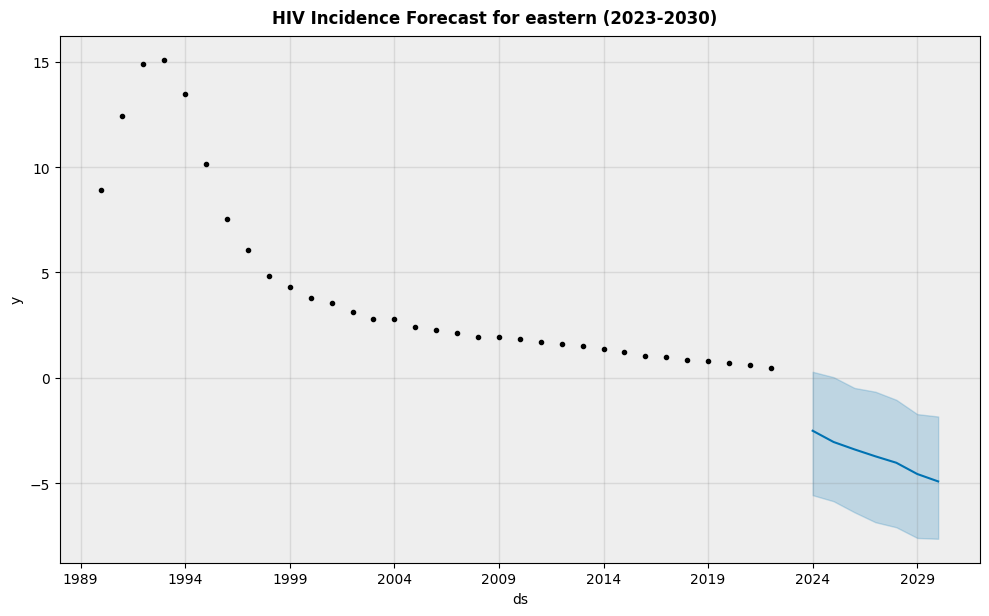

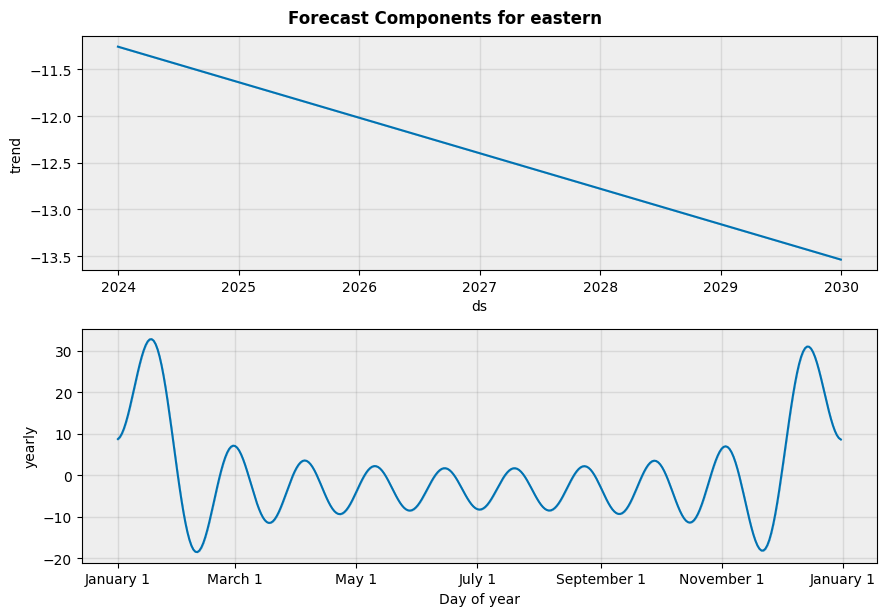

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/3881w02w.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/lke3joa2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20455', 'data', 'file=/tmp/tmp5zwvw_l3/3881w02w.json', 'init=/tmp/tmp5zwvw_l3/lke3joa2.json', 'output', 'file=/tmp/tmp5zwvw_l3/prophet_model7db5s50_/prophet_model-20250729122548.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:25:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing



--- Processing nairobi Province ---
Prepared data for nairobi (first 5 rows):
          ds        y
0 1990-01-01  14.6626
1 1991-01-01  14.7560
2 1992-01-01  14.1296
3 1993-01-01  12.9440
4 1994-01-01  11.2417
Prophet model fitted for nairobi.


/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Forecast generated for nairobi (first 5 prediction rows):
          ds      yhat  yhat_lower  yhat_upper
0 2023-12-31 -3.725289   -5.874664   -1.629945
1 2024-12-31 -3.779249   -6.063650   -1.660911
2 2025-12-31 -4.326516   -6.379100   -2.252650
3 2026-12-31 -4.894978   -7.131946   -2.780011
4 2027-12-31 -5.484443   -7.674806   -3.395005
Displaying plots for nairobi...


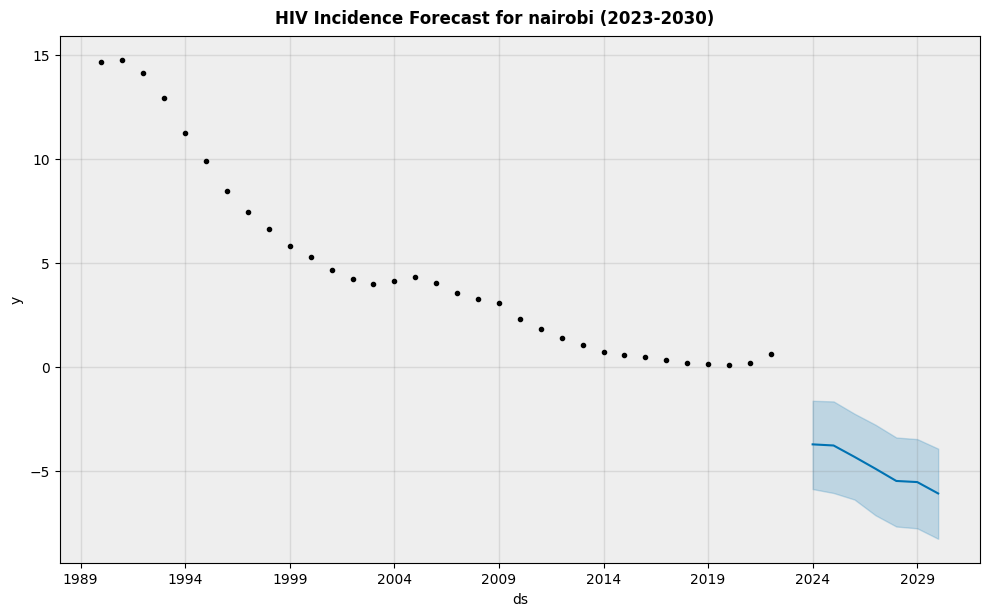

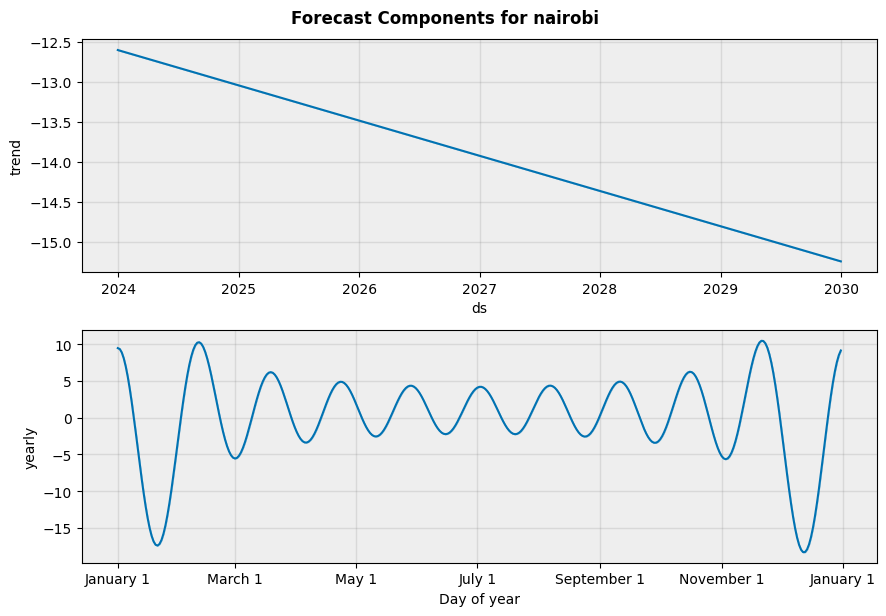

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/aicexk6f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/5qyj8rey.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14060', 'data', 'file=/tmp/tmp5zwvw_l3/aicexk6f.json', 'init=/tmp/tmp5zwvw_l3/5qyj8rey.json', 'output', 'file=/tmp/tmp5zwvw_l3/prophet_model63hpvkkq/prophet_model-20250729122549.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



--- Processing north eastern Province ---
Prepared data for north eastern (first 5 rows):
          ds       y
0 1990-01-01  6.4174
1 1991-01-01  6.0646
2 1992-01-01  4.6525
3 1993-01-01  3.1492
4 1994-01-01  2.2910


12:25:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Prophet model fitted for north eastern.
Forecast generated for north eastern (first 5 prediction rows):
          ds      yhat  yhat_lower  yhat_upper
0 2023-12-31 -1.684939   -3.099200   -0.195527
1 2024-12-31 -1.551596   -3.023526   -0.149147
2 2025-12-31 -1.744758   -3.182002   -0.272670
3 2026-12-31 -1.962891   -3.495223   -0.491189
4 2027-12-31 -2.205839   -3.791935   -0.802269
Displaying plots for north eastern...


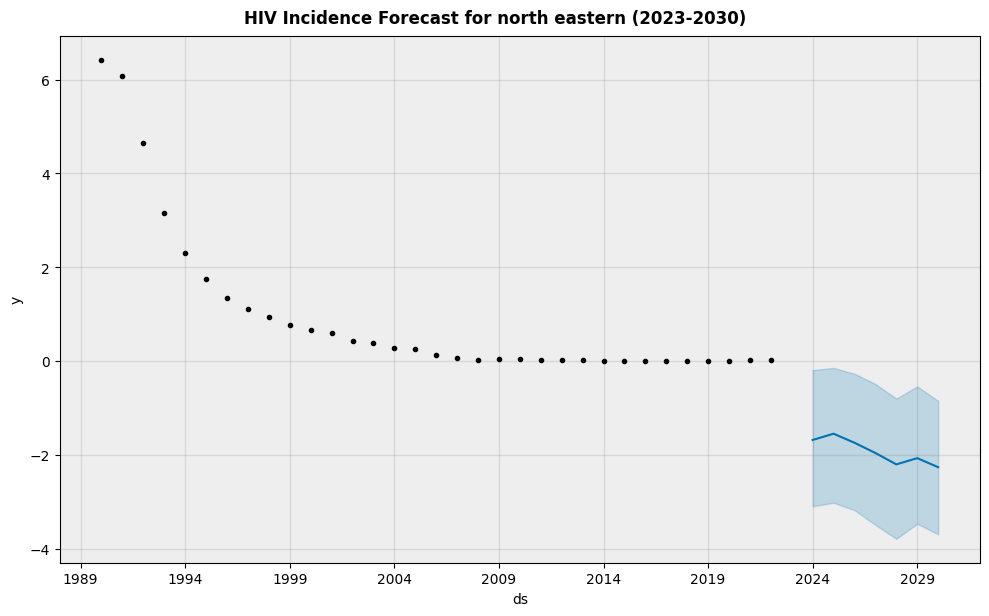

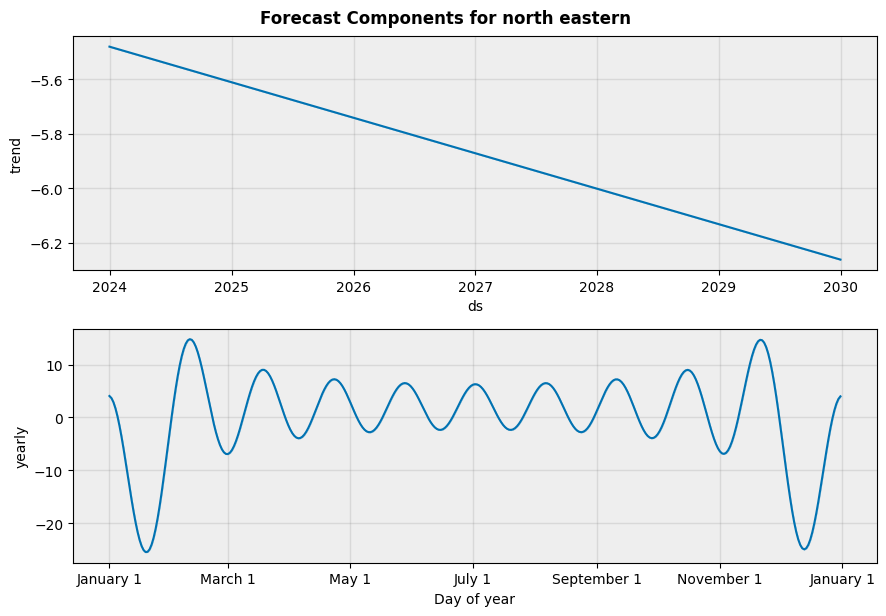

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/4i9xptrz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/c5l_a7mn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72780', 'data', 'file=/tmp/tmp5zwvw_l3/4i9xptrz.json', 'init=/tmp/tmp5zwvw_l3/c5l_a7mn.json', 'output', 'file=/tmp/tmp5zwvw_l3/prophet_modelvn4fflru/prophet_model-20250729122549.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



--- Processing nyanza  Province ---
Prepared data for nyanza  (first 5 rows):
          ds        y
0 1990-01-01  35.3064
1 1991-01-01  39.8624
2 1992-01-01  41.2166
3 1993-01-01  40.2621
4 1994-01-01  37.3430


12:25:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Prophet model fitted for nyanza .
Forecast generated for nyanza  (first 5 prediction rows):
          ds      yhat  yhat_lower  yhat_upper
0 2023-12-31 -5.179106  -10.451704    0.233562
1 2024-12-31 -6.811449  -11.848135   -1.219800
2 2025-12-31 -7.919685  -13.182111   -2.913472
3 2026-12-31 -8.980160  -14.283745   -3.651851
4 2027-12-31 -9.993196  -15.095512   -4.615750
Displaying plots for nyanza ...


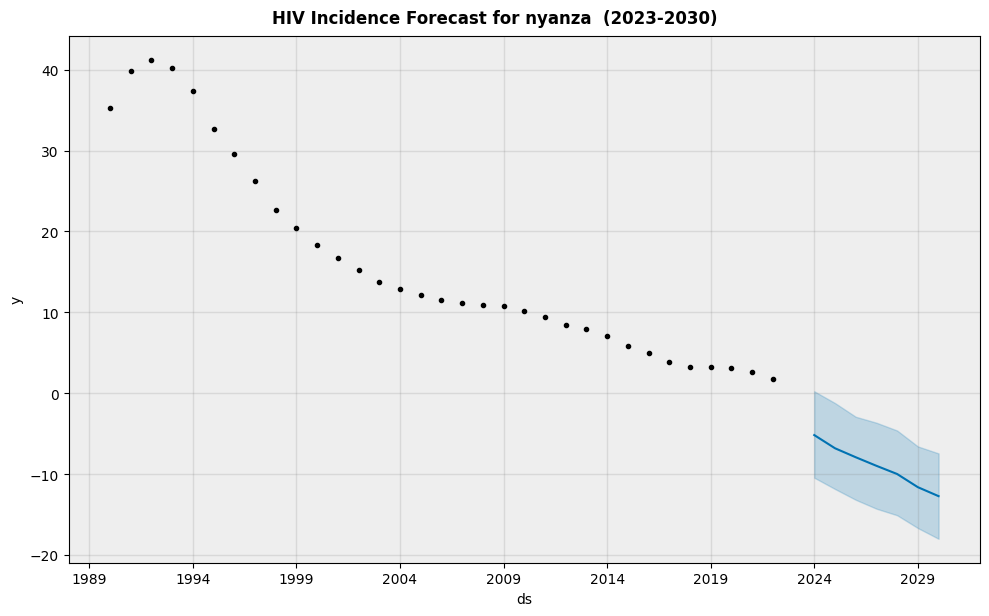

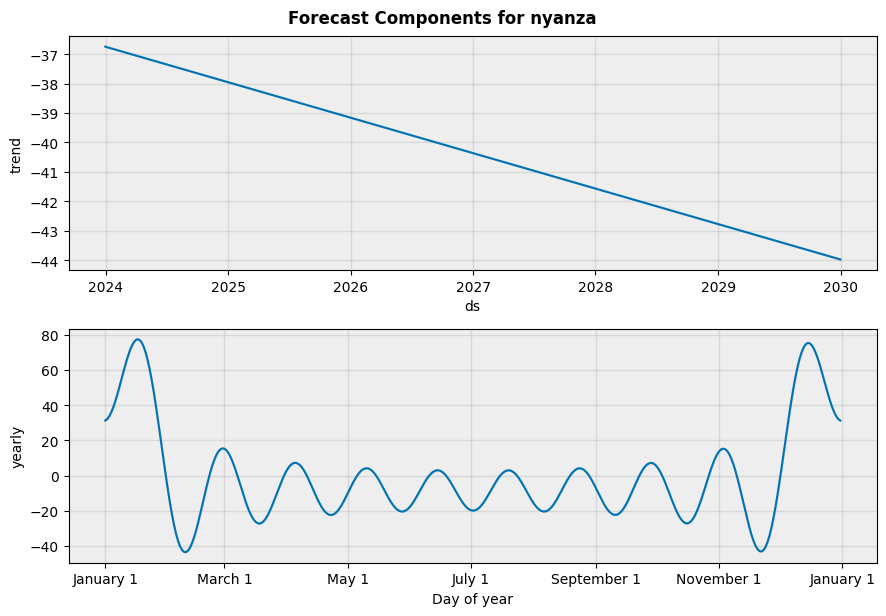

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/ay708s7a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/_r651vg0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=66874', 'data', 'file=/tmp/tmp5zwvw_l3/ay708s7a.json', 'init=/tmp/tmp5zwvw_l3/_r651vg0.json', 'output', 'file=/tmp/tmp5zwvw_l3/prophet_modelhe9itsqd/prophet_model-20250729122551.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



--- Processing riftvalley Province ---
Prepared data for riftvalley (first 5 rows):
          ds        y
0 1990-01-01  17.4566
1 1991-01-01  18.2252
2 1992-01-01  17.4761
3 1993-01-01  14.8927
4 1994-01-01  12.6077


12:25:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Prophet model fitted for riftvalley.
Forecast generated for riftvalley (first 5 prediction rows):
          ds      yhat  yhat_lower  yhat_upper
0 2023-12-31 -3.544246   -6.804119   -0.114444
1 2024-12-31 -3.687251   -6.915415   -0.200061
2 2025-12-31 -4.226375   -7.317962   -0.843032
3 2026-12-31 -4.802619   -8.300643   -1.727242
4 2027-12-31 -5.415784   -8.714846   -2.427202
Displaying plots for riftvalley...


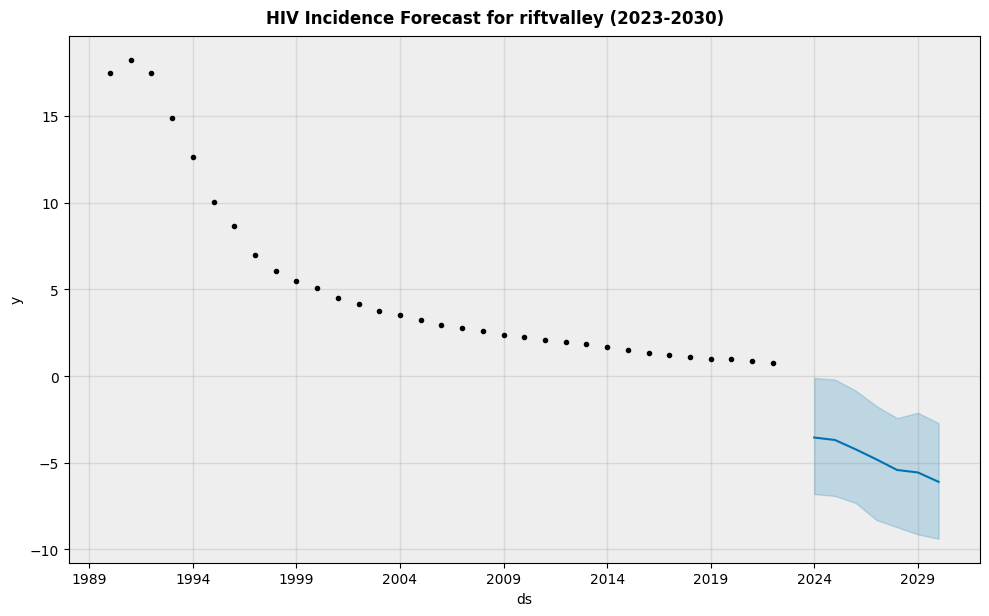

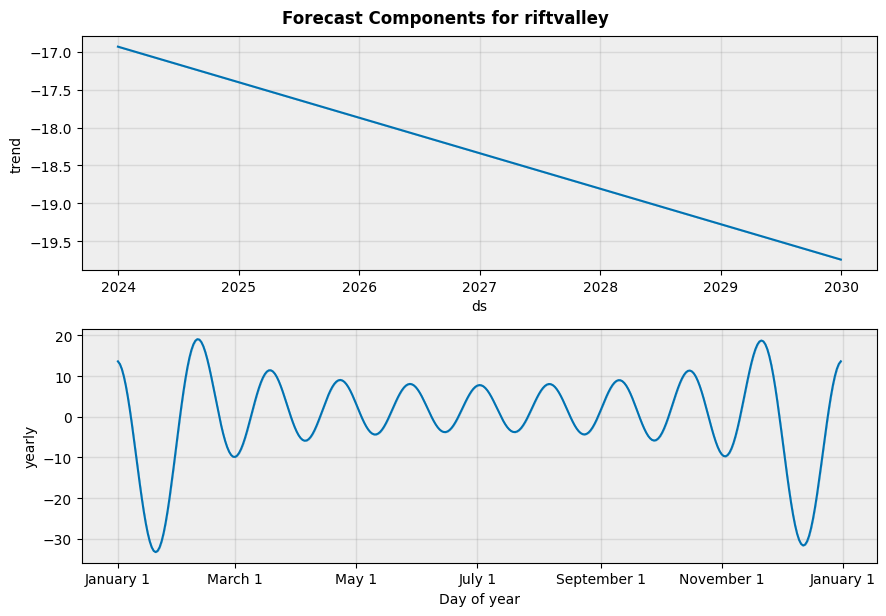

DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/p36gla3q.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp5zwvw_l3/hzvl4hu0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17887', 'data', 'file=/tmp/tmp5zwvw_l3/p36gla3q.json', 'init=/tmp/tmp5zwvw_l3/hzvl4hu0.json', 'output', 'file=/tmp/tmp5zwvw_l3/prophet_model3hq5z8i_/prophet_model-20250729122552.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:25:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing



--- Processing western Province ---
Prepared data for western (first 5 rows):
          ds        y
0 1990-01-01  22.9993
1 1991-01-01  23.8143
2 1992-01-01  21.9611
3 1993-01-01  19.4072
4 1994-01-01  15.7901


12:25:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


Prophet model fitted for western.
Forecast generated for western (first 5 prediction rows):
          ds      yhat  yhat_lower  yhat_upper
0 2023-12-31 -5.696963  -10.806219   -0.760618
1 2024-12-31 -5.529898  -10.371718   -0.794454
2 2025-12-31 -6.324684  -11.021692   -1.459318
3 2026-12-31 -7.179445  -11.676806   -2.351730
4 2027-12-31 -8.093760  -12.963651   -3.185084
Displaying plots for western...


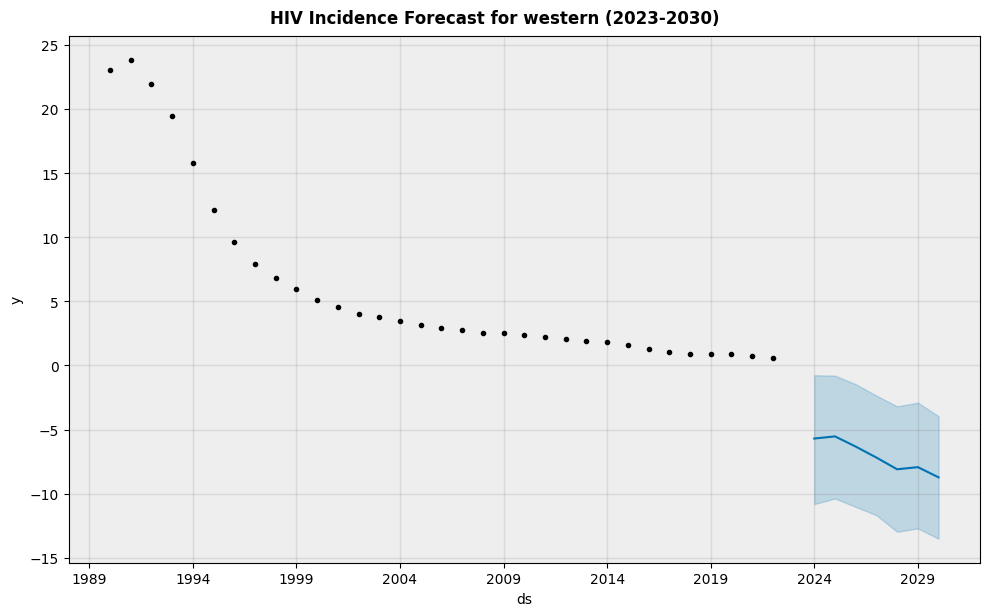

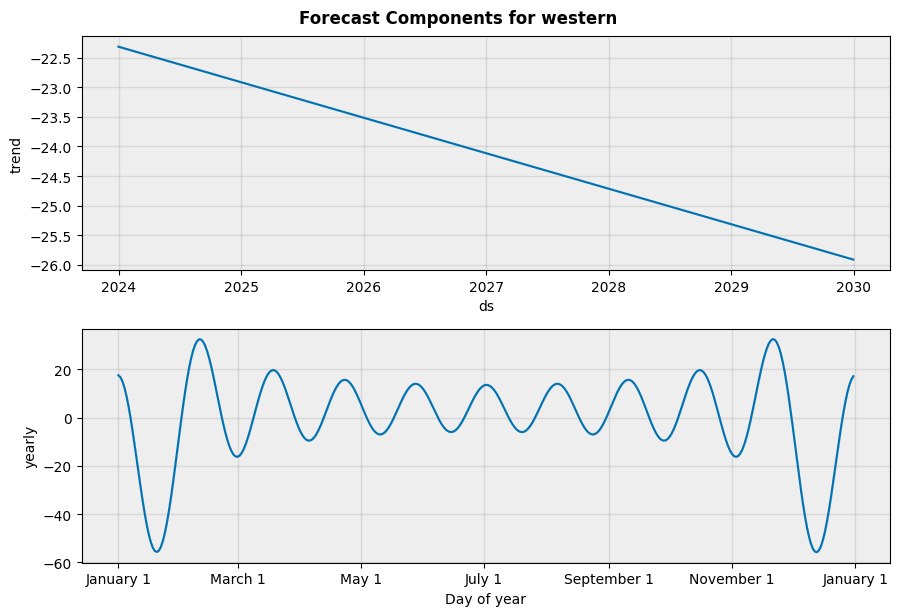


--- Consolidated Forecasts for All Provinces (2023-2030) ---
          ds  central_yhat  central_yhat_lower  central_yhat_upper  \
0 2023-12-31     -3.050141           -6.210213           -0.280201   
1 2024-12-31     -3.402626           -6.756927           -0.459470   
2 2025-12-31     -3.775924           -6.758358           -0.678150   
3 2026-12-31     -4.151382           -7.180329           -1.328404   
4 2027-12-31     -4.529002           -7.610891           -1.532619   
5 2028-12-31     -4.881487           -8.061348           -1.934583   
6 2029-12-31     -5.254785           -8.118991           -2.460663   

   coast_yhat  coast_yhat_lower  coast_yhat_upper  eastern_yhat  \
0   -4.993969         -8.274508         -1.765712     -2.514584   
1   -4.747761         -8.459760         -1.240824     -3.049264   
2   -5.497504         -8.980472         -2.104166     -3.400895   
3   -6.306627         -9.803391         -2.942467     -3.729428   
4   -7.174696        -10.325862         -3

In [240]:

# Suppress specific warnings from Prophet related to 'optimization failed'
warnings.filterwarnings('ignore', category=UserWarning, module='prophet')

# step 1. Loading the data to be forecasted

try:
    df1 = pd.read_excel('HIV INCIDENCE KENYA DATASET.xlsx', index_col=None)
    print("DataFrame loaded successfully:")
    print(df1.head())
    print("\nColumns in your DataFrame:", df1.columns.tolist())
except FileNotFoundError:
    print("Error: 'HIV INCIDENCE KENYA DATASET.xlsx' not found.")
    print("Please upload the file to your Colab session storage or check the file name.")
    exit()

# step 2.Column province identification
province_columns = [col for col in df1.columns if col != 'year']

if not province_columns:
    print("\nError: No province columns found. Please ensure your DataFrame has 'year' and other columns for provinces.")
    exit()

print(f"\nIdentified province columns: {province_columns}")

# Dictionary to store forecasts for each province
all_province_forecasts = {}

# Step 3. Looping Through Each Province and Apply Prophet ---
for province in province_columns:
    print(f"\n--- Processing {province} Province ---")

    # 3.1 Preparing the data for Prophet
    # Select 'year' and the current province's data
    df_prophet = df1[['year', province]].copy()

    # Renaming columns to 'ds' (datestamp) and 'y' (value) as required by Prophet
    df_prophet.rename(columns={'year': 'ds', province: 'y'}, inplace=True)

    # Converting 'ds' to datetime objects as required by prophet.
    # Assuming 'year' column contains only year integers (e.g., 1990, 1991).
    df_prophet['ds'] = pd.to_datetime(df_prophet['ds'], format='%Y')

    # confirming 'y' column is numeric and handle any potential non-numeric values
    df_prophet['y'] = pd.to_numeric(df_prophet['y'], errors='coerce')
    df_prophet.dropna(subset=['y'], inplace=True) # Drop rows where 'y' became NaN

    if df_prophet.empty:
        print(f"Skipping {province} as it contains no valid data after preparation.")
        continue

    print(f"Prepared data for {province} (first 5 rows):")
    print(df_prophet.head())


    model = Prophet(
        yearly_seasonality=True,
        daily_seasonality=False,
        weekly_seasonality=False

    )

    # Fitting the model to the historical data
    model.fit(df_prophet)
    print(f"Prophet model fitted for {province}.")

    # 3.3 Make Future Predictions (2023 to 2030)
    # We Create a DataFrame with future dates for which you want predictions.
    # We need 8 periods (2023 to 2030 inclusive).
    future_dates = model.make_future_dataframe(periods=8, freq='Y')

    # Filtering 'future_dates' to ensure it only includes years from 2023 onwards
    future_dates = future_dates[future_dates['ds'].dt.year >= 2023]

    if future_dates.empty:
        print(f"Warning: No future dates generated for {province} after 2023 filter. Check year data.")
        continue

    # Generating the forecast
    forecast = model.predict(future_dates)
    print(f"Forecast generated for {province} (first 5 prediction rows):")
    print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())

    # Storing the relevant part of the forecast (predictions for 2023-2030)
    all_province_forecasts[province] = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].copy()
    all_province_forecasts[province].rename(columns={'yhat': f'{province}_yhat',
                                                    'yhat_lower': f'{province}_yhat_lower',
                                                    'yhat_upper': f'{province}_yhat_upper'}, inplace=True)


    # 3.4 Visualizing the Forecast
    print(f"Displaying plots for {province}...")
    fig1 = model.plot(forecast)
    fig1.suptitle(f'HIV Incidence Forecast for {province} (2023-2030)', y=1.02, fontweight='bold')
    plt.show()

    fig2 = model.plot_components(forecast)
    fig2.suptitle(f'Forecast Components for {province}', y=1.02,fontweight='bold')
    plt.show()

#Step 4. Consolidating and Displaying All Forecasts
print("\n--- Consolidated Forecasts for All Provinces (2023-2030) ---")

if not all_province_forecasts:
    print("No forecasts were generated. Check for data issues or errors in previous steps.")
else:
    # Merging all individual province forecasts into a single DataFrame for easier viewing/export
    final_forecast_df = None
    for province, df_forecast in all_province_forecasts.items():
        if final_forecast_df is None:
            final_forecast_df = df_forecast[['ds', f'{province}_yhat', f'{province}_yhat_lower', f'{province}_yhat_upper']]
        else:
            final_forecast_df = pd.merge(final_forecast_df, df_forecast[['ds', f'{province}_yhat', f'{province}_yhat_lower', f'{province}_yhat_upper']], on='ds', how='outer')

    print(final_forecast_df)


print("\n--- Prediction Process Complete ---")

**REPORT FROM FUTURE PREDICTION**

The prediction model highlights a significant drop in the HIV incidence per 1000 people across the 8 provinces from 2023 to 2030.

1. Central is predicted to drop from an all time high incidence of 15 to an incident value of 1 in 2030.

2. Eastern is predicted to drop from an all time high value of 15 to an incident value of 1 in 2030.

3. Coast is predicted to drop from an all time high value of 20 to an incident value of 1 in 2030.

4. Nairobi is predicted to drop from an all time high value of 15 to an incident value of 2 in 2030.

5. North eastern is predicted to drop from an all time high value of 7 to an an incident value of 0 in 2030.

6. Nyanza is predicted to drop from an all time high value of 40 to an incident value of 1 in 2030.

7. Riftvalley is predicted to drop from an all time high value of 17 to an incident value of 1 in 2030.

8. Western is predicted to drop from an all time high value of 24 to an incident value of 1 in 2030.

